In [62]:
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import os
from Modulo import text_proc as txt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# count_vect = contVectorizer()
# x_counts = count_bect.fit_transform(np.array(x)) list of texts, each text is a string
# y = np.asrray(y)

# tdfif_transformer = tfidftransformer()
# x_tfidf = tfidf_transformer.fit_transform(x_counts)

# 2.xmlla etiqueta 1-5
# 2.review.pos --> texto lemmatizado --> eliminar los tokens que son stopwords y signos de puntuación-->

Obtenemos los archivos con los que vamos a trabajar, en este caso los review.pos y los archivos .xml

In [23]:
path = './corpusCriticasCine/'

# Obtenemos una lista con todos los archivos en el corpus y los dividimos en x, y
name_files = os.listdir(path)
pos_file = list(filter(lambda x: x.endswith('.review.pos'), name_files))
xml_file = list(filter(lambda x: x.endswith('.xml'), name_files))

# Comparamos los archivos para obtener la misma longitud
x, y = txt.obtener_y(path, pos_file, xml_file)       
print('pos_file:', len(x),'\nXml_file:', len(y))

pos_file: 3878 
Xml_file: 3878


In [24]:
text = [txt.obtener_text(path, pos_file[i]) for i,j in enumerate(x)]

In [25]:
text_clean =[txt.normalizar(text[i]) for i in range(len(text))]

In [26]:
count_vect = CountVectorizer()
x_counts = count_vect.fit_transform(np.array(text_clean)) #list of texts, each text is a string
y = np.asarray(y)

In [28]:
tdfif_transformer = TfidfTransformer()
x_tfidf = tdfif_transformer.fit_transform(x_counts)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, shuffle = True, random_state=0)

In [57]:
clf = GaussianNB()
clf.fit(X_train.todense(), y_train)
    
# y_predict = clf.predict(X_test)

c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


GaussianNB()

In [71]:
y_predict = clf.predict(X_test.todense())
# x_p = np.asarray(X_test, dtype=object)
# y_predict = clf.predict(np.asarray(x_p))
print (accuracy_score(y_test, y_predict))

c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.35695876288659795


              precision    recall  f1-score   support

           1       0.20      0.03      0.05        72
           2       0.43      0.34      0.38       199
           3       0.36      0.57      0.44       247
           4       0.33      0.33      0.33       169
           5       0.23      0.10      0.14        89

    accuracy                           0.36       776
   macro avg       0.31      0.28      0.27       776
weighted avg       0.34      0.36      0.33       776

[[  9  27  48   5   0]
 [ 10  56  79  22   2]
 [ 14  51 142  39   1]
 [  5  24  97  68   5]
 [  1  13  33  23   2]]


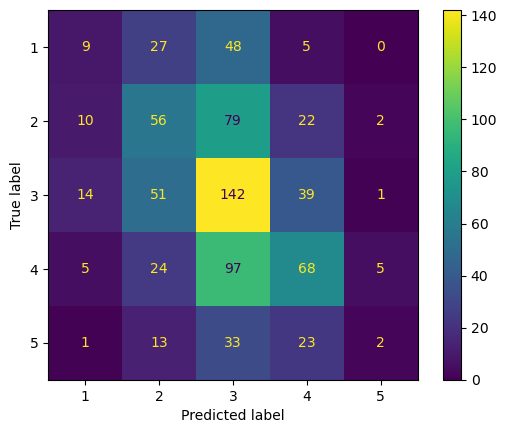

In [65]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_test, y_predict, target_names=target_names))
cm = confusion_matrix(y_test, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

In [11]:
k_text = KMeans()
k_text.fit(x_tfidf, y)

KMeans()

In [12]:
k_text.predict(x_tfidf[2])

array([2])